In [17]:
# Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its
# first 10 rows.
import pandas as pd

path = "/content/sample_data/BIKE DETAILS.csv"
data = pd.read_csv(path)
print(data.head(10))

                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000     

In [27]:
# Question 2: Check for missing values in all columns and describe your approach for
# handling them.
# Approach would be
# 1. load all data in DataFrame
# 2. use isnull and isna for the checking null or empty row
# 3.

import pandas as pd

path = "/content/sample_data/BIKE DETAILS.csv"
data = pd.read_csv(path)
dup_data = data
# print(dup_data.isna())
cleaned_data = dup_data.dropna()

print(cleaned_data)


                                     name  selling_price  year seller_type  \
2     Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3       Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
5                        Honda CB Twister          18000  2010  Individual   
6                    Honda CB Hornet 160R          78500  2018  Individual   
9                      Bajaj Discover 125          50000  2016  Individual   
...                                   ...            ...   ...         ...   
1056                            Activa 3g          17000  2010  Individual   
1057                     Honda CB twister          16000  2012  Individual   
1058                   Bajaj Discover 125          15000  2013  Individual   
1059                       Honda CB Shine          12000  2009  Individual   
1060                     Bajaj Pulsar 150          10000  2008  Individual   

          owner  km_driven  ex_showroom_price  
2     1st owner

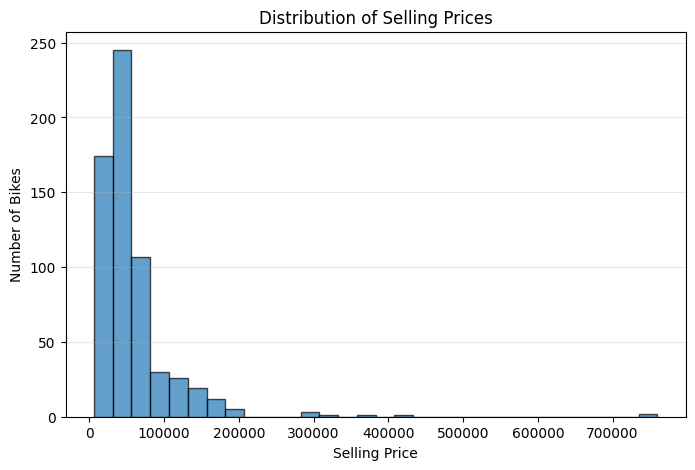

In [29]:
# Question 3: Plot the distribution of selling prices using a histogram and describe the
# overall trend
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/sample_data/BIKE DETAILS.csv")
cleaned_data = data.dropna()
plt.figure(figsize=(8,5))
plt.hist(cleaned_data["selling_price"],bins=30, edgecolor='black', alpha=0.7)
plt.title("Distribution of Selling Prices")
plt.xlabel("Selling Price")
plt.ylabel("Number of Bikes")
plt.grid(axis='y', alpha=0.3)
plt.show()

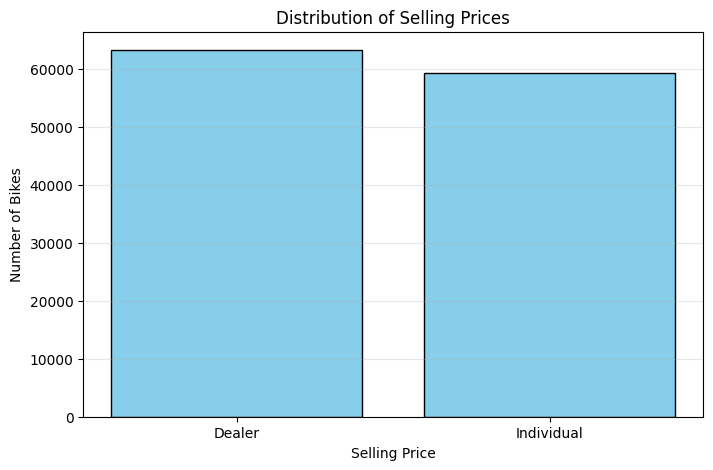

In [31]:
# Question 4: Create a bar plot to visualize the average selling price for each seller_type
# and write one observation.
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/sample_data/BIKE DETAILS.csv")
cleaned_data = data.dropna()

avg_price = cleaned_data.groupby('owner')['selling_price'].mean()

plt.figure(figsize=(8,5))
plt.bar(avg_price.index, avg_price.values, color='skyblue', edgecolor='black')
plt.title("Distribution of Selling Prices")
plt.xlabel("Selling Price")
plt.ylabel("Number of Bikes")
plt.grid(axis='y', alpha=0.3)
plt.show()

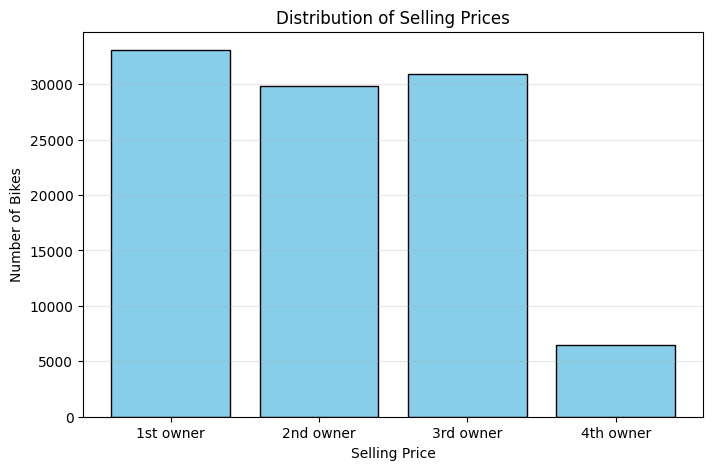

In [38]:
# Question 5: Compute the average km_driven for each ownership type (1st owner,
# 2nd owner, etc.), and present the result as a bar plot.
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/sample_data/BIKE DETAILS.csv")
cleaned_data = data.dropna()

avg_km = cleaned_data.groupby('owner')['km_driven'].mean()

plt.figure(figsize=(8,5))
plt.bar(avg_km.index, avg_km.values, color='skyblue', edgecolor='black')
plt.title("Distribution of Selling Prices")
plt.xlabel("Selling Price")
plt.ylabel("Number of Bikes")
plt.grid(axis='y', alpha=0.3)
plt.show()

In [41]:
# Question 6: Use the IQR method to detect and remove outliers from the km_driven
# column. Show before-and-after summary statistics.

import pandas as pd

# Read dataset
data = pd.read_csv("/content/sample_data/BIKE DETAILS.csv")

# Drop missing values
cleaned_data = data.dropna()


print("Before removing outliers:")
print(cleaned_data['km_driven'].describe())

Q1 = cleaned_data['km_driven'].quantile(0.25)
Q3 = cleaned_data['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


filtered_data = cleaned_data[
    (cleaned_data['km_driven'] >= lower_bound) &
    (cleaned_data['km_driven'] <= upper_bound)
]

print("\nAfter removing outliers:")
print(filtered_data['km_driven'].describe())


Before removing outliers:
count       626.000000
mean      32671.576677
std       45479.661039
min         380.000000
25%       13031.250000
50%       25000.000000
75%       40000.000000
max      585659.000000
Name: km_driven, dtype: float64

After removing outliers:
count      603.000000
mean     27038.996683
std      18553.370807
min        380.000000
25%      12609.000000
50%      24000.000000
75%      38475.000000
max      80000.000000
Name: km_driven, dtype: float64


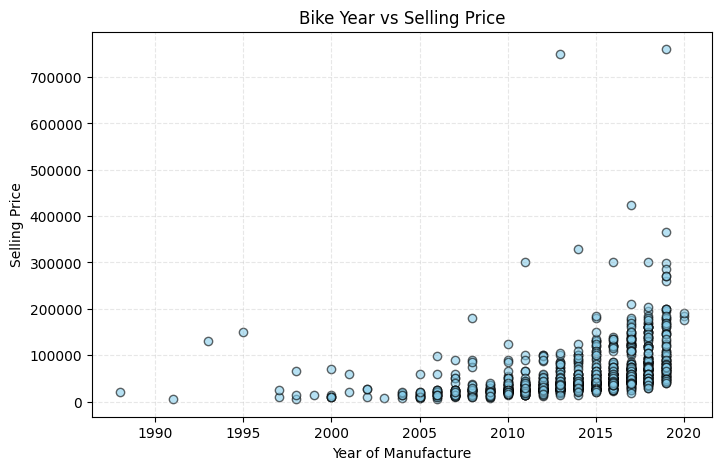

In [42]:
# Question 7: Create a scatter plot of year vs. selling_price to explore the
# relationship between a bike's age and its price.
import pandas as pd
import matplotlib.pyplot as plt

# Read dataset
data = pd.read_csv("/content/sample_data/BIKE DETAILS.csv")

# Drop rows with missing values
cleaned_data = data.dropna(subset=['year', 'selling_price'])

# Scatter plot: Year vs Selling Price
plt.figure(figsize=(8,5))
plt.scatter(cleaned_data['year'], cleaned_data['selling_price'],
            color='skyblue', alpha=0.6, edgecolors='k')

plt.title("Bike Year vs Selling Price")
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price")
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


In [43]:
# Question 8: Convert the seller_type column into numeric format using one-hot
# encoding. Display the first 5 rows of the resulting DataFrame.
import pandas as pd

# Read dataset
data = pd.read_csv("/content/sample_data/BIKE DETAILS.csv")

# Drop missing values
cleaned_data = data.dropna(subset=['seller_type'])

# Apply one-hot encoding
encoded_data = pd.get_dummies(cleaned_data, columns=['seller_type'], prefix='seller')

# Display the first 5 rows
print(encoded_data.head())


                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_Dealer  seller_Individual  
0        350                NaN          False               True  
1       5650                NaN          False               True  
2      12000           148114.0          False               True  
3      23000            89643.0          False               True  
4      21000                NaN          False               True  


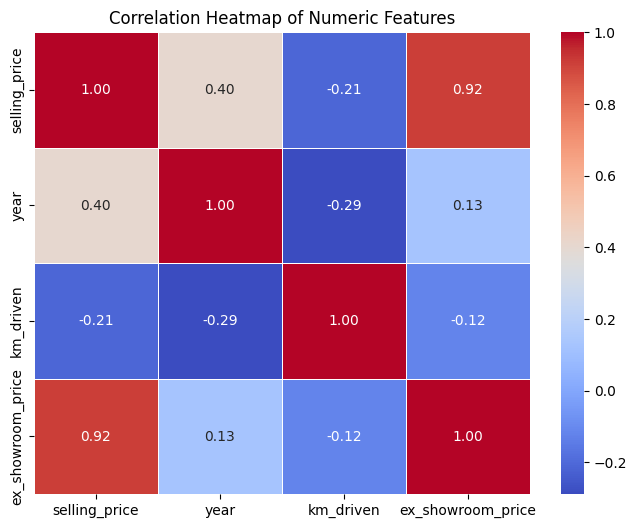

In [44]:
# Question 9: Generate a heatmap of the correlation matrix for all numeric columns.
# What correlations stand out the most?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
data = pd.read_csv("/content/sample_data/BIKE DETAILS.csv")

# Keep only numeric columns
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


In [ ]:
# Question 10: Summarize your findings in a brief report:
# ● What are the most important factors affecting a bike's selling price?
# ● Mention any data cleaning or feature engineering you performed.